In [3]:
import numpy as np

csv_path = "mtfuji_data.csv"

np.set_printoptions(suppress=True)
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

print(fuji[130:140])

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


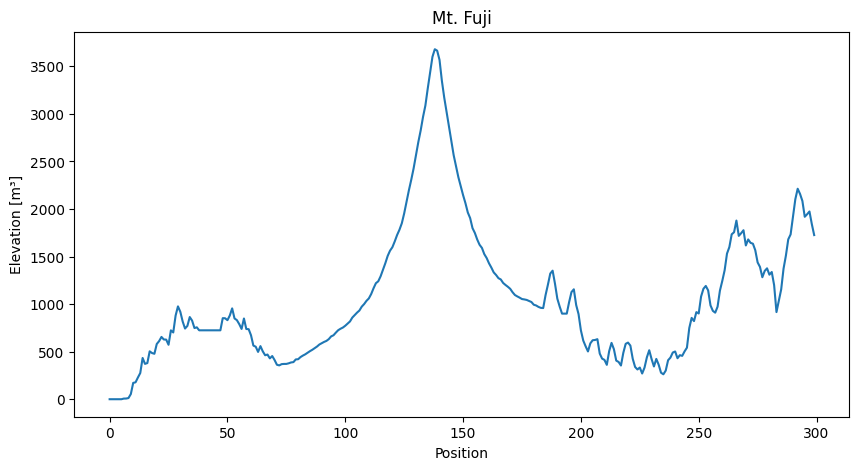

In [53]:
import matplotlib.pyplot as plt

point_numbers = fuji[:, 0]  # first column
elevation = fuji[:, 3]      # Fourth column (elevation)

# Plotting the graph
plt.figure(figsize=(10, 5))
plt.plot(point_numbers, elevation)

plt.xlabel("Position")
plt.ylabel("Elevation [m³]")
plt.title("Mt. Fuji")
plt.show()

In [75]:
def calculate_inclination(fuji, point):
    if point <= 0 or point >= len(fuji):
        raise ValueError("The point must be within the valid range (1 to N-1)")

    x1, y1 = fuji[point -1, 0], fuji[point-1, 3] # Previous point
    x2, y2 = fuji[point, 0], fuji[point, 3] # Current point

    gradient = (y2-y1) / (x2-x1)

    return gradient

ponto_teste = 130
inclinacao = calculate_inclination(fuji, ponto_teste)
print(f"Inclinação no ponto {ponto_teste}: {inclinacao}")

Inclinação no ponto 130: 137.30000000000018


In [101]:
import numpy as np

def compute_next_point(point, alpha, fuji):
    gradient = calculate_inclination(fuji,point)
    
    next_point = int(round(float(point - alpha * gradient))) 

    next_point = max(0, min(next_point, len(fuji) - 1))

    return next_point

starting_point = 110
alpha = 0.2


next_point = compute_next_point(starting_point, alpha, fuji)

print(f"Starting point: {starting_point}")
print(f"Next point: {next_point}")

Starting point: 110
Next point: 105


In [102]:
import numpy as np

def descend_mountain(start_point, alpha, fuji):
    path = [start_point]
    current_point = start_point

    while True:
        next_point = compute_next_point(current_point, alpha, fuji)

        if next_point == current_point: # If there is no change, we stop
            break
        
        path.append(next_point)
        current_point = next_point # Update the current point

    return path


start_point = 136
alpha = 0.2

path_taken = descend_mountain(start_point, alpha, fuji)

print(f"Path taken: {path_taken}")


Path taken: [136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]


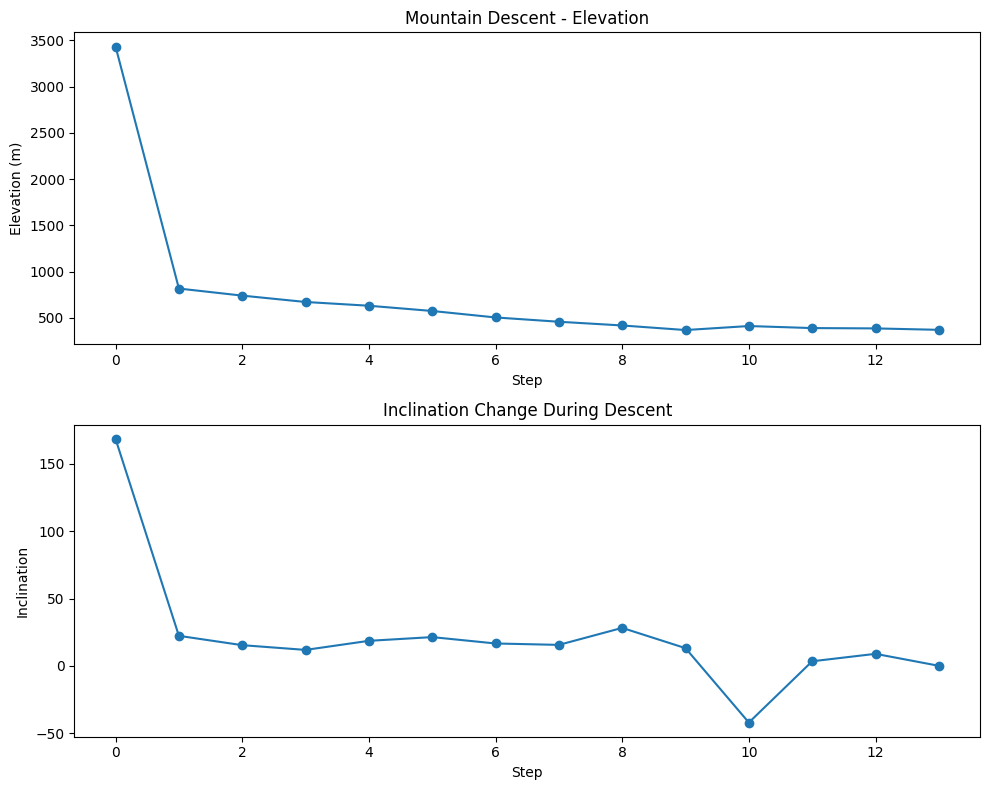

In [108]:
import numpy as np
import matplotlib.pyplot as plt

def compute_next_point(point, alpha, fuji):
    gradient = calculate_inclination(fuji,point)
    next_point = int(round(point - alpha * gradient))
    next_point = max(0, min(next_point, len(fuji) - 1))
    return next_point

def descend_mountain(start_point, alpha, fuji):
    points = [start_point]
    while True:
        next_point = compute_next_point(points[-1], alpha, fuji)
        if next_point == points[-1]:  # If there is no further descent, stop
            break
        points.append(next_point)
    return points

def plot_descent(fuji, path):
    elevations = [fuji[p, 3] for p in path]
    gradients = [calculate_inclination(fuji, p) for p in path]

    fig, axes = plt.subplots(2, 1, figsize=(10, 8))

    # Elevation Graph
    axes[0].plot(range(len(path)), elevations, marker='o', linestyle='-')
    axes[0].set_title("Mountain Descent - Elevation")
    axes[0].set_xlabel("Step")
    axes[0].set_ylabel("Elevation (m)")

    # Inclination Graph
    axes[1].plot(range(len(path)), gradients, marker='o', linestyle='-')
    axes[1].set_title("Inclination Change During Descent")
    axes[1].set_xlabel("Step")
    axes[1].set_ylabel("Inclination")

    plt.tight_layout()
    plt.show()

# Definitions
start_point = 136
alpha = 0.2

# Execute descent
descent_path = descend_mountain(start_point, alpha, fuji)

# Plot graphs
plot_descent(fuji, descent_path)


Starting point: 120
Descent path: [120, 113, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]


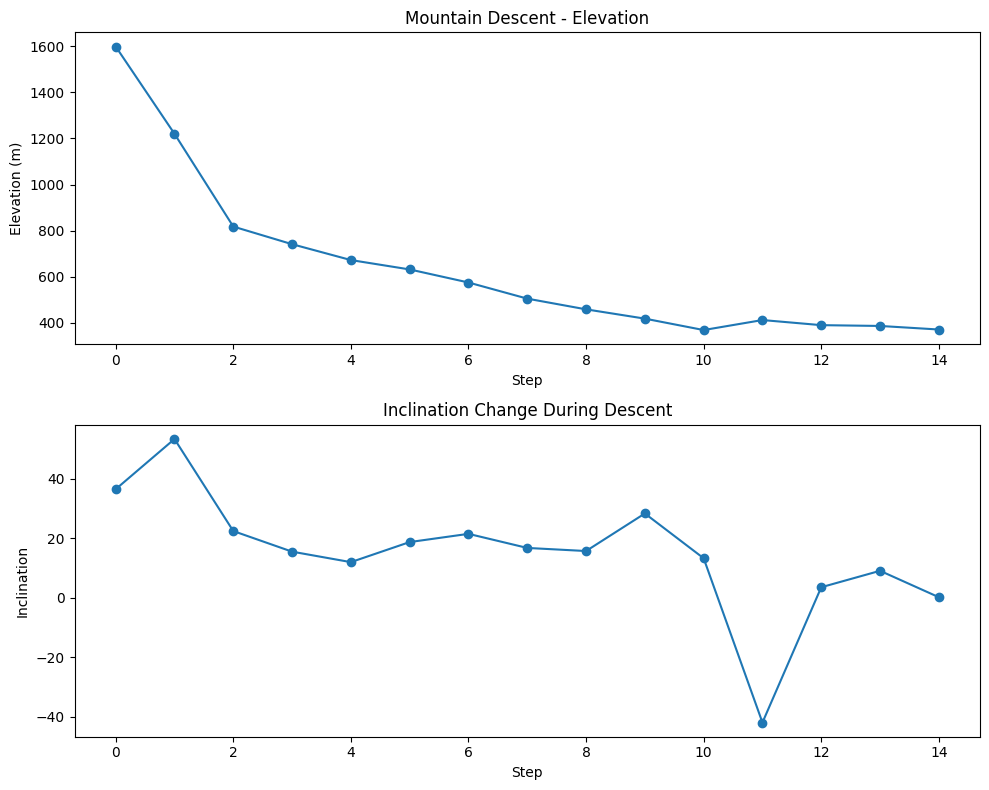

In [112]:
start_point = int(input("Enter the starting point (between 0 and {}): ".format(len(fuji) - 1)))

# Ensure start_point is valid
start_point = max(0, min(start_point, len(fuji) - 1))

alpha = 0.2  # Learning rate

# Compute descent path
descent_path = descend_mountain(start_point, alpha, fuji)

# Display results
print(f"Starting point: {start_point}")
print(f"Descent path: {descent_path}")

# Plot descent
plot_descent(fuji, descent_path)

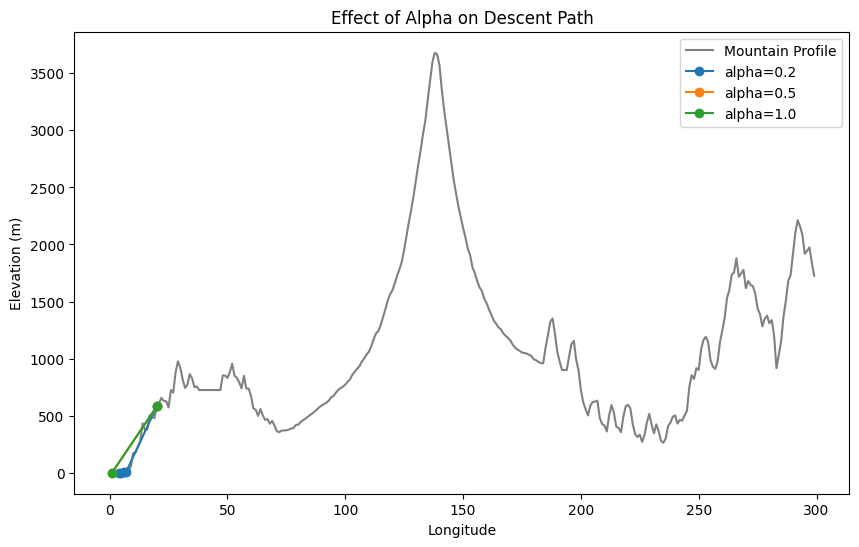

In [147]:
import numpy as np
import matplotlib.pyplot as plt

def plot_multiple_descents(fuji, start_point, alphas):
    """Plot multiple descent paths for different alpha values."""
    plt.figure(figsize=(10, 6))
    plt.plot(fuji[:, 0], fuji[:, 3], label="Mountain Profile", color='gray')

    for alpha in alphas:
        path = descend_mountain(start_point, alpha, fuji)
        elevations = [fuji[p, 3] for p in path]
        plt.plot([fuji[p, 0] for p in path], elevations, marker='o', label=f"alpha={alpha}")

    plt.xlabel("Longitude")
    plt.ylabel("Elevation (m)")
    plt.title("Effect of Alpha on Descent Path")
    plt.legend()
    plt.show()

start_point = 20  # Ensure this is within valid range
alphas = [0.2, 0.5, 1.0]  # Different alpha values to test

plot_multiple_descents(fuji, start_point, alphas)
